# Time Series Segmentation for Anomaly Detection

Python’s [ClaSPy](https://github.com/ermshaua/claspy) package performs time series segmentation. ClaSP is an “unsupervised learning task applied to large, real-world sensor signals for human inspection, change point detection or as preprocessing for classification and anomaly detection.”  ClaSP **automatically partitions a time series into sequential, semantically meaningful segments** that are fully interpretable to human inspection. Interpretability is crucial to connect the segment labels back to the underlying manual labels.  ClaSP is also very accurate, found to be the top performer in a [benchmark study](https://github.com/ermshaua/time-series-segmentation-benchmark) of seven competitor time series segmentation algorithms.

In [1]:
# Load packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [175]:
#!python -m pip install claspy --ignore-installed --user

  Using cached claspy-0.2.2-py3-none-any.whl (33 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
  Using cached pandas-1.5.3-cp38-cp38-win_amd64.whl (11.0 MB)
  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached statsmodels-0.14.1-cp38-cp38-win_amd64.whl (10.0 MB)
  Using cached numba-0.58.1-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Using cached kiwisolver-1.4.5-cp38-cp38-win_amd64.whl (56 kB)
  Using cached pillow-10.3.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached packaging-24.0-py3-none-any.whl (53 kB)
  Us

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.4.0 requires daal==2021.3.0, which is not installed.
tensorflow 2.3.0 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.10.1 which is incompatible.
tensorflow 2.3.0 requires tensorflow-estimator<2.4.0,>=2.3.0, but you have tensorflow-estimator 2.6.0 which is incompatible.
tensorboard 2.4.0 requires google-auth<2,>=1.6.3, but you have google-auth 2.6.0 which is incompatible.



  Using cached zipp-3.18.1-py3-none-any.whl (8.2 kB)
  Using cached importlib_metadata-7.1.0-py3-none-any.whl (24 kB)
  Using cached llvmlite-0.41.1-cp38-cp38-win_amd64.whl (28.1 MB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
  Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [2]:
from claspy.segmentation import BinaryClaSPSegmentation

### Create metadata table

In [4]:
df = pd.DataFrame()
df['test'] = ['Test 1'] * 4 + ['Test 2'] * 4 + ['Test 3'] * 4
df['bearing'] = ['b1x','b2x','b3x','b4x'] * 3
df['t'] = [1] * 4 + [2] * 4 + [3] * 4
df['b'] = [1,2,3,4] * 3
df['window_size'] = 20
#df.head()

# dataset	window_size	cps	time_series

In [5]:
fp = []
var = []
tk = []
sma = []
for r in range(len(df)):
    var.append("ts" + str(df['t'][r]) + "_b" + str(df['b'][r]) + "x")
    tk.append(str(df['test'][r]) + " - Bearing " + str(df['b'][r]) + "x - EMA Kurtosis")
    sma.append(str(df['test'][r]) + " - Bearing " + str(df['b'][r]) + "x - Smoothed Max. Acceleration")
    if df['test'][r] == 'Test 1':
        fp.append("Data/IMS/TS/ts_b" + str(df['b'][r]) + "x_ds10.csv")
    elif df['test'][r] == 'Test 2':
        fp.append("Data/IMS/TS/ts_T2_b" + str(df['b'][r]) + "x_ds10.csv")
    elif df['test'][r] == 'Test 3':
        fp.append("Data/IMS/TS/ts_T3_b" + str(df['b'][r]) + "x_ds10.csv")
    else:
        pass
df['var'] = var
df['title_ktosis'] = tk
df['title_sma'] = sma
df['fp'] = fp
df.head()

,test,bearing,t,b,window_size,var,title_ktosis,title_sma,fp
0,Test 1,b1x,1,1,20,ts1_b1x,Test 1 - Bearing 1x - EMA Kurtosis,Test 1 - Bearing 1x - Smoothed Max. Acceleration,Data/IMS/TS/ts_b1x_ds10.csv
1,Test 1,b2x,1,2,20,ts1_b2x,Test 1 - Bearing 2x - EMA Kurtosis,Test 1 - Bearing 2x - Smoothed Max. Acceleration,Data/IMS/TS/ts_b2x_ds10.csv
2,Test 1,b3x,1,3,20,ts1_b3x,Test 1 - Bearing 3x - EMA Kurtosis,Test 1 - Bearing 3x - Smoothed Max. Acceleration,Data/IMS/TS/ts_b3x_ds10.csv
3,Test 1,b4x,1,4,20,ts1_b4x,Test 1 - Bearing 4x - EMA Kurtosis,Test 1 - Bearing 4x - Smoothed Max. Acceleration,Data/IMS/TS/ts_b4x_ds10.csv
4,Test 2,b1x,2,1,20,ts2_b1x,Test 2 - Bearing 1x - EMA Kurtosis,Test 2 - Bearing 1x - Smoothed Max. Acceleration,Data/IMS/TS/ts_T2_b1x_ds10.csv


### Import data for all 12 bearings

In [6]:
b_data = []
for b in range(len(df)):
    b_data.append(pd.read_csv(df['fp'][b]))
    if df['t'][b] == 1:
        b_data[b] = b_data[b].iloc[160:,]
        b_data[b].reset_index(drop=True, inplace=True)
    b_data[b]['kt_EMA'] = b_data[b]['ktosis'].ewm(span=40,adjust=False).mean()
    print(df['test'][b], df['bearing'][b])
    print(b_data[b].shape)
#b_data[0]

Test 1 b1x
(1996, 22)
Test 1 b2x
(1996, 22)
Test 1 b3x
(1996, 22)
Test 1 b4x
(1996, 22)
Test 2 b1x
(984, 22)
Test 2 b2x
(984, 22)
Test 2 b3x
(984, 22)
Test 2 b4x
(984, 22)
Test 3 b1x
(6324, 22)
Test 3 b2x
(6324, 22)
Test 3 b3x
(6324, 22)
Test 3 b4x
(6324, 22)


### Plot EMA Kurtosis & Smoothe Max. Acceleration Time-Domain Features for each bearing - for manual label review

In [7]:
for i in range(len(df)):
    print(df['var'][i])
    # EXPONENTIAL MAVG KURTOSIS
    chart_data = np.array(b_data[i]['kt_EMA'])
    #print(chart_data.shape)
    #print(df['title_ktosis'][i])
    plt.figure(figsize=(8,6))
    plt.plot(chart_data)
    plt.ylabel("Kurtosis")
    plt.xlabel("Time")
    plt.title(df['title_ktosis'][i])
    plt.tight_layout()
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_chart_kt_EMA.png', bbox_inches='tight')
    plt.close()
    #######
    # SMOOTHED MAX ACCELERATION
    chart_data = np.array(b_data[i]['abs_acc_5'])
    #print(chart_data.shape)
    #print(df['title_sma'][i])
    plt.figure(figsize=(8,6))
    plt.plot(chart_data)
    plt.ylabel("Smoothed Max Acceleration (Avg. 5 highest abs. values)")
    plt.xlabel("Cycle (1-second snapshots)")
    plt.title(df['title_sma'][i])
    plt.tight_layout()
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_chart_SMA.png', bbox_inches='tight')
    plt.close()

ts1_b1x
ts1_b2x
ts1_b3x
ts1_b4x
ts2_b1x
ts2_b2x
ts2_b3x
ts2_b4x
ts3_b1x
ts3_b2x
ts3_b3x
ts3_b4x


**Sample charts: Zoom in on a section of the chart to better identify change points**

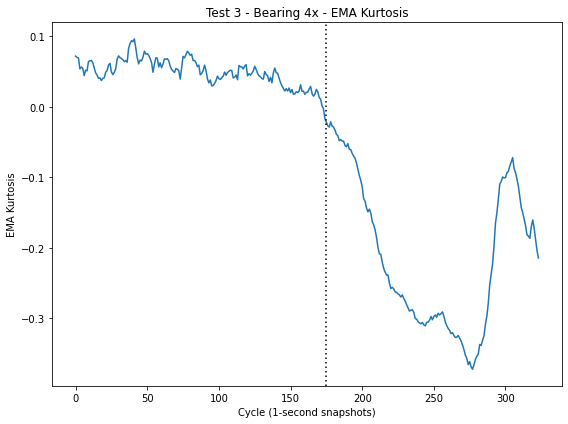

In [8]:
plt.figure(figsize=(8,6))
plt.plot(np.array(b_data[11]['kt_EMA'][6000:]))
plt.axvline(x=175, color="black", dashes=(1,2))
#plt.axvline(x=6174, color="black", dashes=(1,2))
plt.ylabel("EMA Kurtosis")
plt.xlabel("Cycle (1-second snapshots)")
plt.title(df['title_ktosis'][11])
plt.tight_layout()
plt.show()
plt.close()

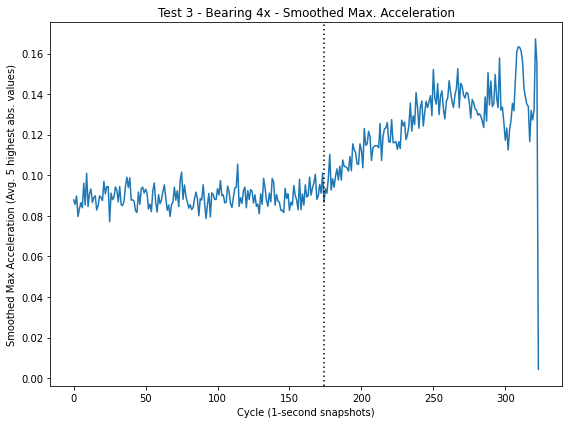

In [9]:
plt.figure(figsize=(8,6))
plt.plot(np.array(b_data[11]['abs_acc_5'][6000:]))
plt.axvline(x=174, color="black", dashes=(1,2))
#plt.axvline(x=6174, color="black", dashes=(1,2))
plt.ylabel("Smoothed Max Acceleration (Avg. 5 highest abs. values)")
plt.xlabel("Cycle (1-second snapshots)")
plt.title(df['title_sma'][11])
plt.tight_layout()
plt.show()
plt.close()

### Manual Labels
 - Test 1
     0. B1x: change point (CP) at index **1973**. Identified by both kurtosis and acceleration measures.
     1. B2x: CP at index **1961**. Identified only by acceleration measure.
     2. B3x: CPs at index **[1667, 1905]**. Identified by both kurtosis and acceleration measures.
     3. B4x: CPs at index **[1307, 1594]**. Identified by both kurtosis and acceleration measures.
 - Test 2
     4. B1x: CP at index **975**. Identified by both kurtosis and acceleration measures.
     5. B2x: CPs at index **[875, 966]**. Identified by both kurtosis and acceleration measures.
     6. B3x: CPs at index **[860, 981]**. Identified by both kurtosis and acceleration measures.
     7. B4x: CPs at index **[861, 982]**. Identified by both kurtosis and acceleration measures.
 - Test 3
     8. B1x: CPs at index **[350, 5967, 6323]**. Identified by acceleration measure.
     9. B2x: CPs at index **[6174, 6323]**. Identified by acceleration measure.
     10. B3x: CPs at index **[6174, 6323]**. Identified by acceleration measure.
     11. B4x: CPs at index **[6174, 6323]**. Identified by acceleration measure.

In [10]:
# Update cutpoints in metadata table
df['cps'] = [[1973],
             [1961],
             [1667,1905], # T1 B3x - FAILED
             [1307,1594], # T1 B4x - FAILED
             [975], # T2 B1x - FAILED
             [875,966],
             [860,981],
             [861,982],
             [350, 5967,6323],
             [6174,6323],
             [6174,6323], # T3 B3x - FAILED
             [6174,6323]
            ]

In [11]:
# Update EMA Kurtosis and Smoothed Max Acceleration charts to visualize change points
for i in range(len(df)):
    print(df['var'][i])
    # EXPONENTIAL MAVG KURTOSIS
    chart_data = np.array(b_data[i]['kt_EMA'])
    plt.figure(figsize=(8,6))
    plt.plot(chart_data)
    # plot change points identified by manual labeling
    if len(df['cps'][i]) == 0:
        pass
    elif len(df['cps'][i]) == 1:
        plt.axvline(x=df['cps'][i][0], color="black", dashes=(1,2))
    elif len(df['cps'][i]) == 2:
        plt.axvline(x=df['cps'][i][0], color="black", dashes=(1,2))
        plt.axvline(x=df['cps'][i][1], color="black", dashes=(1,2))
    else:
        pass
    plt.ylabel("Kurtosis")
    plt.xlabel("Time")
    plt.title(df['title_ktosis'][i])
    plt.tight_layout()
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_chart_kt_EMA.png', bbox_inches='tight')
    plt.close()
    #######
    # SMOOTHED MAX ACCELERATION
    chart_data = np.array(b_data[i]['abs_acc_5'])
    plt.figure(figsize=(8,6))
    plt.plot(chart_data)
    # plot change points identified by manual labeling
    if len(df['cps'][i]) == 0:
        pass
    elif len(df['cps'][i]) == 1:
        plt.axvline(x=df['cps'][i][0], color="black", dashes=(1,2))
    elif len(df['cps'][i]) == 2:
        plt.axvline(x=df['cps'][i][0], color="black", dashes=(1,2))
        plt.axvline(x=df['cps'][i][1], color="black", dashes=(1,2))
    else:
        pass
    plt.ylabel("Smoothed Max Acceleration (Avg. 5 highest abs. values)")
    plt.xlabel("Cycle (1-second snapshots)")
    plt.title(df['title_sma'][i])
    plt.tight_layout()
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_chart_SMA.png', bbox_inches='tight')
    plt.close()

ts1_b1x
ts1_b2x
ts1_b3x
ts1_b4x
ts2_b1x
ts2_b2x
ts2_b3x
ts2_b4x
ts3_b1x
ts3_b2x
ts3_b3x
ts3_b4x


### Time Series Segmentation with ClaSP

https://github.com/ermshaua/claspy

ClaSP should automatically detect semantic changes between signals and deduce their segmentation. It is parameter-free, so we just need to pass the time series as a numpy array.

### Segment + Chart: Loop through all 12 bearings

### Default settings

In [12]:
EKT = []
SMA = []
for i in range(len(df)):
    print(df['var'][i])
    # EXPONENTIAL MAVG KURTOSIS
    seg_data = np.array(b_data[i]['kt_EMA'])
    #print(seg_data.shape)
    #print(df['title_ktosis'][i])
    clasp = BinaryClaSPSegmentation()
    clasp.fit_predict(seg_data)
    #print(clasp)
    EKT.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_ktosis'][i], gt_cps=np.array(df['cps'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_kt_EMA_w' + str(clasp.window_size) + '.png', 
                bbox_inches='tight')
    plt.close()
    #######
    # SMOOTHED MAX ACCELERATION
    seg_data = np.array(b_data[i]['abs_acc_5'])
    #print(seg_data.shape)
    #print(df['title_sma'][i])
    clasp = BinaryClaSPSegmentation()
    clasp.fit_predict(seg_data)
    #print(clasp)
    SMA.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_sma'][i], gt_cps=np.array(df['cps'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_SMA_w' + str(clasp.window_size) + '.png', 
                bbox_inches='tight')
    plt.close()

ts1_b1x


C:\Users\nadav.rindler\AppData\Roaming\Python\Python38\site-packages\numba\np\ufunc\parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)
C:\Users\nadav.rindler\AppData\Roaming\Python\Python38\site-packages\claspy\nearest_neighbour.py:240: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  start, end = pranges[idx]


(1, [])
(1, [])
ts1_b2x
(2, [])
(2, [])
ts1_b3x
(3, [])
(3, [1589])
ts1_b4x
(4, [1201])
(4, [1308])
ts2_b1x
(5, [])
(5, [599])
ts2_b2x
(6, [])
(6, [649])
ts2_b3x
(7, [])
(7, [678])
ts2_b4x
(8, [])
(8, [653])
ts3_b1x
(9, [])
(9, [])
ts3_b2x
(10, [])
(10, [3931, 5608])
ts3_b3x
(11, [])
(11, [5729])
ts3_b4x
(12, [5655])
(12, [6039])


In [13]:
print(EKT)
df['pred_cps_EKT_default'] = EKT
print(SMA)
df['pred_cps_SMA_default'] = SMA

[[], [], [], [1201], [], [], [], [], [], [], [], [5655]]
[[], [], [1589], [1308], [599], [649], [678], [653], [], [3931, 5608], [5729], [6039]]


### Set window_size = 20

Change the window size parameter setting to make the algorithm more sensitive to changes in the underlying ts, i.e., more likely to identify change points.

In [14]:
EKT = []
SMA = []
for i in range(len(df)):
    print(df['var'][i])
    # EXPONENTIAL MAVG KURTOSIS
    seg_data = np.array(b_data[i]['kt_EMA'])
    clasp = BinaryClaSPSegmentation(window_size=df['window_size'][i])
    clasp.fit_predict(seg_data)
    #print(clasp)
    EKT.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_ktosis'][i], gt_cps=np.array(df['cps'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_kt_EMA_w20.png', 
                bbox_inches='tight')
    plt.close()
    #######
    # SMOOTHED MAX ACCELERATION
    seg_data = np.array(b_data[i]['abs_acc_5'])
    clasp = BinaryClaSPSegmentation(window_size=df['window_size'][i])
    clasp.fit_predict(seg_data)
    #print(clasp)
    SMA.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_sma'][i], gt_cps=np.array(df['cps'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_SMA_w20.png', 
                bbox_inches='tight')
    plt.close()

ts1_b1x
(1, [])
(1, [])
ts1_b2x
(2, [])
(2, [])
ts1_b3x
(3, [1896])
(3, [])
ts1_b4x
(4, [])
(4, [])
ts2_b1x
(5, [880])
(5, [861])
ts2_b2x
(6, [850])
(6, [861])
ts2_b3x
(7, [840])
(7, [861])
ts2_b4x
(8, [])
(8, [876])
ts3_b1x
(9, [])
(9, [])
ts3_b2x
(10, [])
(10, [])
ts3_b3x
(11, [6193])
(11, [6106])
ts3_b4x
(12, [])
(12, [])


In [15]:
print(EKT)
df['pred_cps_EKT_w20'] = EKT
print(SMA)
df['pred_cps_SMA_w20'] = SMA

[[], [], [1896], [], [880], [850], [840], [], [], [], [6193], []]
[[], [], [], [], [861], [861], [861], [876], [], [], [6106], []]


In [16]:
df[['var','cps','pred_cps_EKT_default','pred_cps_SMA_default','pred_cps_EKT_w20','pred_cps_SMA_w20']]

,var,cps,pred_cps_EKT_default,pred_cps_SMA_default,pred_cps_EKT_w20,pred_cps_SMA_w20
0,ts1_b1x,[1973],[],[],[],[]
1,ts1_b2x,[1961],[],[],[],[]
2,ts1_b3x,"[1667, 1905]",[],[1589],[1896],[]
3,ts1_b4x,"[1307, 1594]",[1201],[1308],[],[]
4,ts2_b1x,[975],[],[599],[880],[861]
5,ts2_b2x,"[875, 966]",[],[649],[850],[861]
6,ts2_b3x,"[860, 981]",[],[678],[840],[861]
7,ts2_b4x,"[861, 982]",[],[653],[],[876]
8,ts3_b1x,"[350, 5967, 6323]",[],[],[],[]
9,ts3_b2x,"[6174, 6323]",[],"[3931, 5608]",[],[]


### Try extending final segment (which includes failure) in time series by an additional 150 obs. to see if ClaSPy can pick up on the change

Due to the "Window Size" and "Exclude Radius" parameter settings, ClaSPy change points lag behind changes in the time series. (This is necessary, otherwise ClaSPy would have too many false positives by picking up on every small change in the time series). More discussion in the written report.

In [17]:
# Take average of final failure segment and copy to extend the time series by an additional ~150 obs.
    # Test 1 ~ obs. 1990-1996
    # Test 2 ~ obs. 980-984
    # Test 3 = obs. 6323

EKT = []
SMA = []
for i in range(len(df)):
    print(df['var'][i])
    # EXPONENTIAL MAVG KURTOSIS
    if df['t'][i] == 1:
        seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][1990:])]*150)))
    elif df['t'][i] == 2:
        seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][980:])]*150)))
    elif df['t'][i] == 3:
        seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][6323:])]*150)))
    else:
        pass
    #print(seg_data.shape)
    #print(df['title_ktosis'][i])
    clasp = BinaryClaSPSegmentation()
    clasp.fit_predict(seg_data)
    #print(clasp)
    EKT.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_ktosis'][i], gt_cps=np.array(df['cps'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_kt_EMA_def_ext.png', 
                bbox_inches='tight')
    plt.close()
    #######
    # SMOOTHED MAX ACCELERATION
    if df['t'][i] == 1:
        seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][1990:])]*150)))
    elif df['t'][i] == 2:
        seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][980:])]*150)))
    elif df['t'][i] == 3:
        seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][6323:])]*150)))
    else:
        pass
    #print(seg_data.shape)
    #print(df['title_sma'][i])
    clasp = BinaryClaSPSegmentation()
    clasp.fit_predict(seg_data)
    #print(clasp)
    SMA.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_sma'][i], gt_cps=np.array(df['cps'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_SMA_def_ext.png', 
                bbox_inches='tight')
    plt.close()

ts1_b1x
(1, [])
(1, [])
ts1_b2x
(2, [1875])
(2, [1911])
ts1_b3x
(3, [])
(3, [1591])
ts1_b4x
(4, [1198, 1683])
(4, [1307])
ts2_b1x
(5, [])
(5, [])
ts2_b2x
(6, [732])
(6, [653])
ts2_b3x
(7, [])
(7, [739])
ts2_b4x
(8, [])
(8, [])
ts3_b1x
(9, [])
(9, [])
ts3_b2x
(10, [])
(10, [3931, 5608])
ts3_b3x
(11, [])
(11, [6084])
ts3_b4x
(12, [5655])
(12, [6125])


In [18]:
print(EKT)
df['pred_cps_EKT_def_ext'] = EKT
print(SMA)
df['pred_cps_SMA_def_ext'] = SMA

[[], [1875], [], [1198, 1683], [], [732], [], [], [], [], [], [5655]]
[[], [1911], [1591], [1307], [], [653], [739], [], [], [3931, 5608], [6084], [6125]]


In [19]:
df[['var','cps',
    'pred_cps_EKT_default','pred_cps_SMA_default',
    'pred_cps_EKT_w20','pred_cps_SMA_w20',
    'pred_cps_EKT_def_ext','pred_cps_SMA_def_ext'
   ]]

,var,cps,pred_cps_EKT_default,pred_cps_SMA_default,pred_cps_EKT_w20,pred_cps_SMA_w20,pred_cps_EKT_def_ext,pred_cps_SMA_def_ext
0,ts1_b1x,[1973],[],[],[],[],[],[]
1,ts1_b2x,[1961],[],[],[],[],[1875],[1911]
2,ts1_b3x,"[1667, 1905]",[],[1589],[1896],[],[],[1591]
3,ts1_b4x,"[1307, 1594]",[1201],[1308],[],[],"[1198, 1683]",[1307]
4,ts2_b1x,[975],[],[599],[880],[861],[],[]
5,ts2_b2x,"[875, 966]",[],[649],[850],[861],[732],[653]
6,ts2_b3x,"[860, 981]",[],[678],[840],[861],[],[739]
7,ts2_b4x,"[861, 982]",[],[653],[],[876],[],[]
8,ts3_b1x,"[350, 5967, 6323]",[],[],[],[],[],[]
9,ts3_b2x,"[6174, 6323]",[],"[3931, 5608]",[],[],[],"[3931, 5608]"


### Best result - shorten window size for shorter time series (Test 2), leave as default window size for longer time series (Tests 1 and 3)

When experimenting with the window size parameter setting - which governs how sensitive the ClaSPy algorithm is to changes in the time series, and how quickly a change in the time series will be reflected in a change point - several window size options did not work for Test 2 data because the time series is <2,000 obs.  Therefore, I manually shortened the window size for Test 2 bearings, and left as default for Tests 1 and 3.

**Example error**

In [20]:
clasp = BinaryClaSPSegmentation(window_size='fft')
clasp.fit_predict(np.array(b_data[3]['kt_EMA']))

C:\Users\nadav.rindler\AppData\Roaming\Python\Python38\site-packages\claspy\segmentation.py:206: UserWarning: Time series must at least have 2*min_seg_size data points for segmentation. Try setting a smaller window size.
  warnings.warn(


array([], dtype=float64)

Indeed, the ClaSPy package may be more suited to longer time series -- the package's built-in sample data includes 75 time series, of which 75% are longer than 1,985 observations!

In [21]:
from claspy.data_loader import load_tssb_dataset
tssb = load_tssb_dataset()
x = []
for i in range(len(tssb)):
    x.append(len(tssb['time_series'][i]))
pd.Series(x).describe()

count       75.000000
mean      4793.293333
std       3865.944728
min        240.000000
25%       1984.500000
50%       3456.000000
75%       6511.000000
max      20700.000000
dtype: float64

In [22]:
# Set new window size based on Test 1 & 3 vs. Test 2
    # suss is the default window size
    # Source: https://github.com/ermshaua/claspy/blob/main/claspy/notebooks/clasp_configuration.ipynb
j = ['suss'] * 4, [10] * 4, ['suss'] * 4
df['ws_new'] = [x for xs in j for x in xs]

In [23]:
EKT = []
SMA = []
for i in range(len(df)):
    print(df['var'][i])
    # EXPONENTIAL MAVG KURTOSIS
    if df['t'][i] == 1:
        seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][1990:])]*150)))
    elif df['t'][i] == 2:
        seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][980:])]*150)))
    elif df['t'][i] == 3:
        seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][6323:])]*150)))
    else:
        pass
    #print(seg_data.shape)
    #print(df['title_ktosis'][i])
    clasp = BinaryClaSPSegmentation(window_size=df['ws_new'][i])
    clasp.fit_predict(seg_data)
    #print(clasp)
    EKT.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_ktosis'][i], gt_cps=np.array(df['cps'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_kt_EMA_new_ext.png', 
                bbox_inches='tight')
    plt.close()
    #######
    # SMOOTHED MAX ACCELERATION
    if df['t'][i] == 1:
        seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][1990:])]*150)))
    elif df['t'][i] == 2:
        seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][980:])]*150)))
    elif df['t'][i] == 3:
        seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][6323:])]*150)))
    else:
        pass
    #print(seg_data.shape)
    #print(df['title_sma'][i])
    clasp = BinaryClaSPSegmentation(window_size=df['ws_new'][i])
    clasp.fit_predict(seg_data)
    #print(clasp)
    SMA.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_sma'][i], gt_cps=np.array(df['cps'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_SMA_new_ext.png', 
                bbox_inches='tight')
    plt.close()

ts1_b1x
(1, [])
(1, [])
ts1_b2x
(2, [1875])
(2, [1911])
ts1_b3x
(3, [])
(3, [1591])
ts1_b4x
(4, [1198, 1683])
(4, [1307])
ts2_b1x
(5, [])
(5, [])
ts2_b2x
(6, [880, 984])
(6, [939])
ts2_b3x
(7, [])
(7, [984])
ts2_b4x
(8, [896])
(8, [769, 910])
ts3_b1x
(9, [])
(9, [])
ts3_b2x
(10, [])
(10, [3931, 5608])
ts3_b3x
(11, [])
(11, [6084])
ts3_b4x
(12, [5655])
(12, [6125])


In [24]:
print(EKT)
df['pred_cps_EKT_new_ext'] = EKT
print(SMA)
df['pred_cps_SMA_new_ext'] = SMA

[[], [1875], [], [1198, 1683], [], [880, 984], [], [896], [], [], [], [5655]]
[[], [1911], [1591], [1307], [], [939], [984], [769, 910], [], [3931, 5608], [6084], [6125]]


In [25]:
df[['var','cps',
    'pred_cps_EKT_new_ext','pred_cps_SMA_new_ext'
   ]]

,var,cps,pred_cps_EKT_new_ext,pred_cps_SMA_new_ext
0,ts1_b1x,[1973],[],[]
1,ts1_b2x,[1961],[1875],[1911]
2,ts1_b3x,"[1667, 1905]",[],[1591]
3,ts1_b4x,"[1307, 1594]","[1198, 1683]",[1307]
4,ts2_b1x,[975],[],[]
5,ts2_b2x,"[875, 966]","[880, 984]",[939]
6,ts2_b3x,"[860, 981]",[],[984]
7,ts2_b4x,"[861, 982]",[896],"[769, 910]"
8,ts3_b1x,"[350, 5967, 6323]",[],[]
9,ts3_b2x,"[6174, 6323]",[],"[3931, 5608]"


### Final Test: Truncate end of series to exclude final failure stage 
**All** of my manual labels identify a state change within the last 5% of the time series, often within the final 1-2%. This is not surprising -- even the bearings that did not end in failure showed significant signs of deterioration in the final observations of each run-to-failure experiment. Since the 4 bearings in each experiment were attached to the same axle, if one bearing failed it likely placed additional and/or atypical load on the remaining bearings, accelerating their failure.  I want to test removing the final 5% of each time series, to see if the ClaSP algorithm is able to more accurately identify the first state change (healthy --> faulty).

In [26]:
# Test 1:
print(1996*0.97)
# Test 2:
print(984*0.97)
# Test 3:
print(6324*0.97)

1936.12
954.48
6134.28


In [27]:
df['cps_trunc'] = [[],
 [],
 [1667],
 [1307,1594],
 [],
 [875],
 [860],
 [861],
 [350,5967],
 [],
 [],
 []
]

In [28]:
EKT = []
SMA = []
for i in range(len(df)):
    print(df['var'][i])
    # EXPONENTIAL MAVG KURTOSIS
    if df['t'][i] == 1:
        seg_data = np.array(b_data[i]['kt_EMA'][0:1936])
    elif df['t'][i] == 2:
        seg_data = np.array(b_data[i]['kt_EMA'][0:954])
    elif df['t'][i] == 3:
        seg_data = np.array(b_data[i]['kt_EMA'][0:6134])
    else:
        pass
    #print(seg_data.shape)
    #print(df['title_ktosis'][i])
    clasp = BinaryClaSPSegmentation(window_size=df['ws_new'][i])
    clasp.fit_predict(seg_data)
    #print(clasp)
    EKT.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_ktosis'][i], gt_cps=np.array(df['cps_trunc'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_kt_EMA_final.png', 
                bbox_inches='tight')
    plt.close()
    #######
    # SMOOTHED MAX ACCELERATION
    if df['t'][i] == 1:
        seg_data = np.array(b_data[i]['abs_acc_5'][0:1896])
    elif df['t'][i] == 2:
        seg_data = np.array(b_data[i]['abs_acc_5'][0:934])
    elif df['t'][i] == 3:
        seg_data = np.array(b_data[i]['abs_acc_5'][0:6008])
    else:
        pass
    #print(seg_data.shape)
    #print(df['title_sma'][i])
    clasp = BinaryClaSPSegmentation(window_size=df['ws_new'][i])
    clasp.fit_predict(seg_data)
    #print(clasp)
    SMA.append([i for i in clasp.change_points])
    if clasp.change_points.size == 0:
        print((i+1,[]))
    else:
        print((i+1,[i for i in clasp.change_points]))
    clasp.plot(heading=df['title_sma'][i], gt_cps=np.array(df['cps_trunc'][i]))
    plt.savefig('Data/IMS/figures/' + str(df['var'][i]) + '_seg_SMA_final.png', 
                bbox_inches='tight')
    plt.close()

ts1_b1x
(1, [])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1, [])
ts1_b2x
(2, [])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(2, [])
ts1_b3x
(3, [])
(3, [])
ts1_b4x
(4, [1199])
(4, [1308])
ts2_b1x
(5, [876])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(5, [])
ts2_b2x
(6, [880])
(6, [])
ts2_b3x
(7, [867])
(7, [])
ts2_b4x
(8, [])
(8, [])
ts3_b1x
(9, [])
(9, [])
ts3_b2x


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(10, [])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(10, [])
ts3_b3x


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(11, [])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(11, [])
ts3_b4x


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(12, [])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(12, [])


In [29]:
print(EKT)
df['pred_cps_EKT_final'] = EKT
print(SMA)
df['pred_cps_SMA_final'] = SMA

[[], [], [], [1199], [876], [880], [867], [], [], [], [], []]
[[], [], [], [1308], [], [], [], [], [], [], [], []]


In [30]:
df[['var','cps_trunc',
    'pred_cps_EKT_final','pred_cps_SMA_final'
   ]]

,var,cps_trunc,pred_cps_EKT_final,pred_cps_SMA_final
0,ts1_b1x,[],[],[]
1,ts1_b2x,[],[],[]
2,ts1_b3x,[1667],[],[]
3,ts1_b4x,"[1307, 1594]",[1199],[1308]
4,ts2_b1x,[],[876],[]
5,ts2_b2x,[875],[880],[]
6,ts2_b3x,[860],[867],[]
7,ts2_b4x,[861],[],[]
8,ts3_b1x,"[350, 5967]",[],[]
9,ts3_b2x,[],[],[]


### Can Claspy "learn" the correct change points while being fed successive data samples, mimicking real-time data processing?

In real time, we would be collecting bearing signal data at regular intervals and feeding the time series into ClaSPy for change detection. We would not have the luxury of seeing the entire run-to-failure time series before going back and retrospectively segmenting the time series.  Thus it is important to evaluate if mimicking real-time data processing will work, or if it will surface too many early false-positives.

In [31]:
# Speed up processing by changing the interval of re-training based on the length of the time series, to retrain ~ 100x per ts.
    # Test 1 = every 20 obs
    # Test 2 = every 10 obs
    # Test 3 = every 60 obs
j = [20] * 4, [10] * 4, [60] * 4
df['jump'] = [x for xs in j for x in xs]
np.array(df['jump'])

array([20, 20, 20, 20, 10, 10, 10, 10, 60, 60, 60, 60], dtype=int64)

In [32]:
EKT = []
EKT_min = []
SMA = []
SMA_min = []
for i in range(len(df)):
    print(df['var'][i])
    
    # EXPONENTIAL MAVG KURTOSIS
    a = []
    b = []
    for z in range(400,len(b_data[i])+df['jump'][i],df['jump'][i]):
        if df['t'][i] == 1:
            seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][1990:])]*150)))[0:z]
        elif df['t'][i] == 2:
            seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][980:])]*150)))[0:z]
        elif df['t'][i] == 3:
            seg_data = np.concatenate((np.array(b_data[i]['kt_EMA']), np.array([np.mean(b_data[i]['kt_EMA'][6323:])]*150)))[0:z]
        else:
            pass
        #seg_data = np.array(b_data[i]['kt_EMA'][0:z])
        clasp = BinaryClaSPSegmentation(window_size=df['ws_new'][i])
        clasp.fit_predict(seg_data)
        if clasp.change_points.size == 0:
            pass
        else:
            a.append((z,[i for i in clasp.change_points]))
            b.append([i for i in clasp.change_points])
    EKT.append(a)
    EKT_min.append(min([x for xs in b for x in xs], default=[]))
    print(EKT_min[i])
    #######
    # SMOOTHED MAX ACCELERATION
    c = []
    d = []
    for z in range(400,len(b_data[i])+df['jump'][i],df['jump'][i]):
        if df['t'][i] == 1:
            seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][1990:])]*150)))[0:z]
        elif df['t'][i] == 2:
            seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][980:])]*150)))[0:z]
        elif df['t'][i] == 3:
            seg_data = np.concatenate((np.array(b_data[i]['abs_acc_5']), np.array([np.mean(b_data[i]['abs_acc_5'][6323:])]*150)))[0:z]
        else:
            pass
        #seg_data = np.array(b_data[i]['abs_acc_5'][0:z])
        clasp = BinaryClaSPSegmentation(window_size=df['ws_new'][i])
        clasp.fit_predict(seg_data)
        if clasp.change_points.size == 0:
            pass
        else:
            c.append((z,[i for i in clasp.change_points]))
            d.append([i for i in clasp.change_points])
    SMA.append(c)
    SMA_min.append(min([x for xs in d for x in xs], default=[]))
    print(SMA_min[i])

ts1_b1x
[]
[]
ts1_b2x


C:\Users\nadav.rindler\AppData\Roaming\Python\Python38\site-packages\claspy\segmentation.py:206: UserWarning: Time series must at least have 2*min_seg_size data points for segmentation. Try setting a smaller window size.
  warnings.warn(


299
[]
ts1_b3x
[]
1589
ts1_b4x
1197
1241
ts2_b1x
870
[]
ts2_b2x


C:\Users\nadav.rindler\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:8504: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


868
[]
ts2_b3x
864
[]
ts2_b4x
[]
[]
ts3_b1x
414
399
ts3_b2x
[]
1291
ts3_b3x
1539
5760
ts3_b4x
5656
6055


In [33]:
# for i in range(len(EKT)):
#     print(df['var'][i], EKT[i])
# print(EKT_min)

df['pred_cps_EKT_rt_fst'] = EKT_min
df['pred_cps_EKT_rt'] = EKT

# for i in range(len(SMA)):
#     print(df['var'][i], SMA[i])
# print(SMA_min)
    
df['pred_cps_SMA_rt_fst'] = SMA_min
df['pred_cps_SMA_rt'] = SMA

In [34]:
df[['var','cps',
    'pred_cps_EKT_new_ext',
    'pred_cps_EKT_rt_fst','pred_cps_EKT_rt',
    'pred_cps_SMA_new_ext',
    'pred_cps_SMA_rt_fst','pred_cps_SMA_rt'
   ]]

,var,cps,pred_cps_EKT_new_ext,pred_cps_EKT_rt_fst,pred_cps_EKT_rt,pred_cps_SMA_new_ext,pred_cps_SMA_rt_fst,pred_cps_SMA_rt
0,ts1_b1x,[1973],[],[],[],[],[],[]
1,ts1_b2x,[1961],[1875],299,"[(640, [299])]",[1911],[],[]
2,ts1_b3x,"[1667, 1905]",[],[],[],[1591],1589,"[(2000, [1589])]"
3,ts1_b4x,"[1307, 1594]","[1198, 1683]",1197,"[(1580, [1197]), (1600, [1199]), (1620, [1197]...",[1307],1241,"[(1620, [1241]), (1640, [1246]), (1660, [1248]..."
4,ts2_b1x,[975],[],870,"[(940, [870]), (950, [876]), (960, [876]), (97...",[],[],[]
5,ts2_b2x,"[875, 966]","[880, 984]",868,"[(920, [868]), (930, [880]), (940, [880]), (95...",[939],[],[]
6,ts2_b3x,"[860, 981]",[],864,"[(940, [864]), (950, [867]), (960, [867]), (97...",[984],[],[]
7,ts2_b4x,"[861, 982]",[896],[],[],"[769, 910]",[],[]
8,ts3_b1x,"[350, 5967, 6323]",[],414,"[(820, [475]), (1060, [426]), (1120, [466]), (...",[],399,"[(940, [432]), (1000, [432]), (1060, [431]), (..."
9,ts3_b2x,"[6174, 6323]",[],[],[],"[3931, 5608]",1291,"[(1780, [1559]), (2080, [1408]), (2140, [1291]..."


In [35]:
df.to_csv("Data/IMS/results.csv")

# END